## Task 1

In [339]:
import pandas as pd
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import demoji

In [ ]:
df=pd.read_excel('Comments - FilterCopy Videos.xlsx','Every Exam Preparation Ever')
df2=pd.read_excel('Comments - FilterCopy Videos.xlsx','If Salary Were A Person')

### Raw Analysis of Files

In [2]:
df.head()

,Name,Comment,Time,Likes,Reply Count
0,M Square,What a starting🤣🤣🤣,2021-09-16T11:19:50Z,0,0
1,Kushi Jakhotia,All the best for your exam aachese padhna exam...,2021-09-16T11:19:11Z,0,0
2,p i n k p e a c e e,Idk why exam ki prep mein bhi alag h feel aati...,2021-09-16T10:13:06Z,0,0
3,Anurag Bhattarai,I am watching this just hours before my exam,2021-09-16T08:34:14Z,0,0
4,Keya Das,"Everybody... 😂 holi pe nasha karke, rabbi ne c...",2021-09-16T08:13:41Z,0,0


In [3]:
df2.head()

,Name,Comment,Time,Likes,Reply Count
0,FilterCopy,What do you spend your salary on? Comment belo...,2018-07-06T06:23:53Z,2951,192
1,AAYAN KUMAR,i was looking at veer at the beer cafe and he ...,2021-09-16T07:29:31Z,0,0
2,Abhi Borthakur,"And here people like us, whose salary come wit...",2021-09-16T02:57:02Z,0,0
3,Soham Waikar,The husband is nothing but salary in men,2021-09-15T08:18:18Z,0,0
4,Yuvraj Barve,this was the first video of Filtercopy i had s...,2021-09-15T06:57:05Z,0,0


In [4]:
print("No. of Comments in Every Exam Preparation Ever Video:",df.shape[0])

No. of Comments in Every Exam Preparation Ever Video: 5994


In [5]:
print("No. of Comments in If Salary Were A person Video: ",df2.shape[0])

No. of Comments in If Salary Were A person Video:  11019


### NULL Check And Empty Comments

In [6]:
print(df['Comment'].isnull().sum(),
df2['Comment'].isnull().sum())

0 0


### Persons With More Than One Comment 

In [7]:
def grouped_calculation(df):    
    grouped_name_comments=df.groupby('Name')['Comment'].agg(list).reset_index()
    grouped_name_comments['comment_count']=grouped_name_comments['Comment'].apply(lambda x:len(x))
    return grouped_name_comments[grouped_name_comments['comment_count']>1].shape[0]

In [8]:
print("People with More Than one comment in Exam Preparation Ever Video: ",grouped_calculation(df.copy()))
print("People with More Than one comment in If Salary Were A person Video: ",grouped_calculation(df2.copy()))

People with More Than one comment in Exam Preparation Ever Video:  270
People with More Than one comment in If Salary Were A person Video:  446


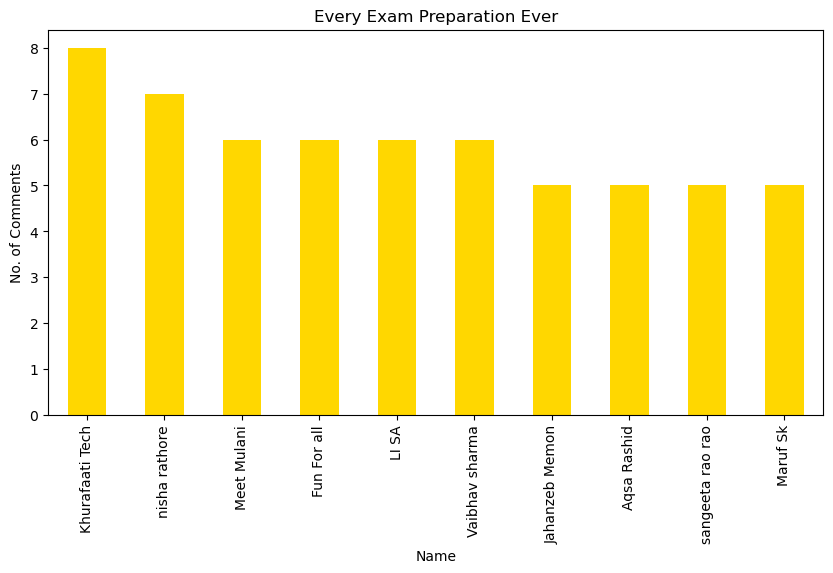

In [9]:
df['Name'].value_counts()[:10].plot(kind='bar',color=['gold'],figsize=(10,5))
plt.title('Every Exam Preparation Ever')
plt.xlabel('Name',fontsize=10)
plt.ylabel('No. of Comments',fontsize=10)
plt.show()

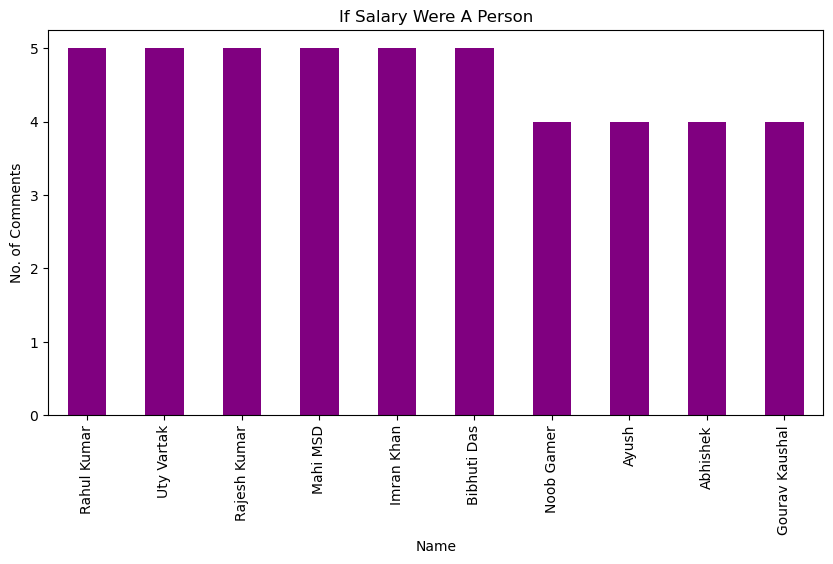

In [10]:
df2['Name'].value_counts()[:10].plot(kind='bar',color=['purple'],figsize=(10,5))
plt.title('If Salary Were A Person')
plt.xlabel('Name',fontsize=10)
plt.ylabel('No. of Comments',fontsize=10)
plt.show()

### Sentiment Analysis of Comments

Since the comments are in Hinglish(Hindi+English) we can not use a our traditional models that are trained in English Languages therefore we are going to use a model that is trained in Hinglish Language. This Model is a fine-tuned model of bert-base-multilingual-codemixed-cased-sentiment.

In [11]:
  tokenizer = AutoTokenizer.from_pretrained("ganeshkharad/gk-hinglish-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("ganeshkharad/gk-hinglish-sentiment")
classifier=pipeline('sentiment-analysis',model=model,tokenizer=tokenizer)

Output contains 3 lables LABEL_0 = Negative ,LABEL_1 = Nuetral ,LABEL_2 = Positive

In [49]:
df['Sentiment']=df['Comment'].apply(lambda x:classifier(str(x))[0]['label'] if(len(str(x))<1000) else None)

In [52]:
mapper={'LABEL_2':'Posative','LABEL_1':'Neutral','LABEL_0':'Negative'}

In [53]:
df['Sentiment']=df['Sentiment'].apply(lambda x:mapper[x] if(x!=None) else None)

### Analysing the Sentiments

In [126]:
#posative
df[df['Sentiment']=='Posative'][:10]['Comment'].values

array(['What a starting🤣🤣🤣',
       'All the best for your exam aachese padhna exam ke liye',
       'Bhai HC Verma sir jinda hai', 'Holi ka mast scene',
       'Truely for my chemistry exam I remembered the same song 🤣🤣',
       'my kindergarden teachers name was Gauri',
       'papa and mummy vala scene funniest tha',
       'Don&#39;t watch this video during your studies or you will 😂😂',
       'Periodic table wali trick mne apply kr li<br>Thanks for this🤣',
       'Cerseii 😂😂<br>Game of thrones'], dtype=object)

In [131]:
# Negative 
df[df['Sentiment']=='Negative'][40:50]['Comment'].values

array(['Exam Dene ja raha hun, Mahishmati ki Jang ladne nahi ja raha hun',
       'Kyu ki youtube mat chodn', 'Pass mat hona',
       '<a href="https://www.youtube.com/watch?v=Xd5yIXCHeEo&amp;t=4m14s">4:14</a> you should not disrespect HC verma sir',
       'EXAM CANCEL', 'did he abuse H C verma?',
       'Hc verma part was sooo gooood!!😅😂😂😂',
       '<b>jo 5th chapter me 3rd law of motion hai,wo konsa jungli mal fukar likha hai</b> 🤣🤣',
       'Agar HC Verma sir Unacademy par parha rahe hotey, toh himmat nahi hoti inki unpar mazaak banaane ki.. Unacademy ke chamchon.👎👎👎👎👎👎',
       'Shameful video HC Verma sir ko aise nhi bolna chahiye tha worst video I have ever seen👎👎👎👎👎'],
      dtype=object)

In [133]:
#Neutral
df[df['Sentiment']=='Neutral'][20:30]['Comment'].values

array(['Filter copy pe Ashish ??', 'Ashish Op', '😂😂',
       'Charas ganja mereko pyara🍺',
       'After 3 years YouTube recommend me this 😔😔😒',
       'Periodic table scene was lit😂😂🤘',
       'Holi pe nasha karke rabbi ne charas fooka it really helps me in my chemistry exam',
       'My exam is in 1 hrs...Mangalsutra padh leta hu....Raksha karega',
       '3rd law of motion 🤣🤣🤣🤣🤣 same I am studying as a student inertia',
       'Who just came here for Ashu'], dtype=object)

Our **Predictions** of Sentiment looks to be pretty accurate. Though Some of them are questionable, its mostly right.

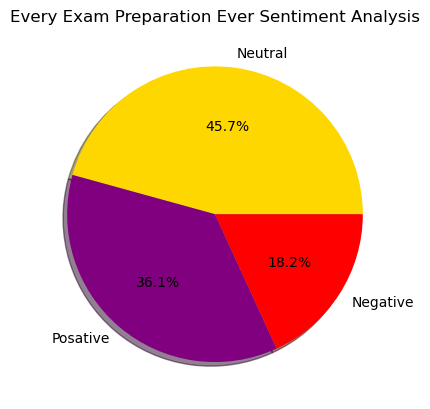

In [98]:
plt.pie(df['Sentiment'].value_counts().values,labels=['Neutral','Posative','Negative'],colors=['gold','purple','red'],normalize=True, textprops = dict(color ="black"),shadow=True,autopct='%1.1f%%')
plt.title('Every Exam Preparation Ever Sentiment Analysis')
plt.show()

Posative Comments Includes 
- Appreciation for the Peroidic Table Learning Trick and most of them found the interaction of Ashish with parents hilarious.

Negative Comments mostly include name calling of HC Verma 

In [89]:
df2['Sentiment']=df2['Comment'].apply(lambda x:classifier(str(x))[0]['label'] if(len(str(x))<1000) else None)
df2['Sentiment']=df2['Sentiment'].apply(lambda x:mapper[x] if(x!=None) else None)

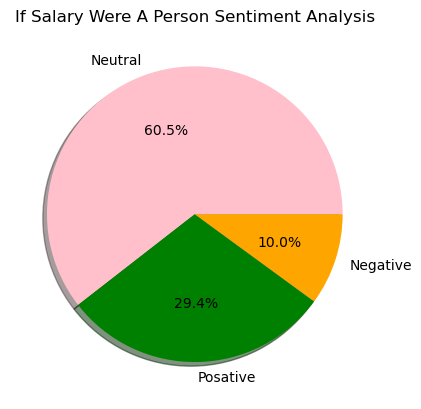

In [138]:
plt.pie(df2['Sentiment'].value_counts().values,labels=['Neutral','Posative','Negative'],colors=['pink','green','orange'],normalize=True, textprops = dict(color ="black"),shadow=True,autopct='%1.1f%%')
plt.title('If Salary Were A Person Sentiment Analysis')
plt.show()

Negative Reviews for if Salary Were a Person Include Comments Such as: 
- Source of Income of Girl and concerns over her job as she is seen free during daytime. 
- Question over why a boy is being portrayed as Salary.Some took it in a sense it is stereotypical to show the girl trying to spend the money and the boy(portrayed as Salary) is concerned over this.

Posative Reviews applauds the **Creativity of video** and the **performace of the Cast**.

### Comment Tone Comparision of Two Videos

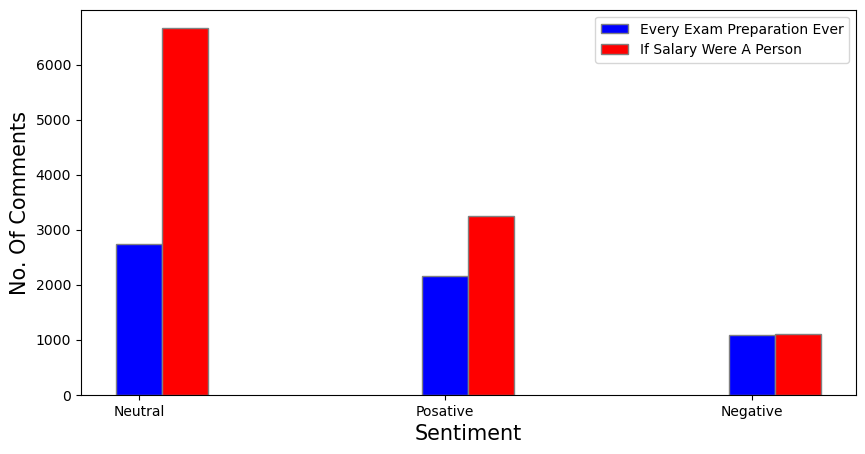

In [197]:
barWidth = 0.15
fig=plt.subplots(figsize=(10,5))
br1 = np.arange(len(df['Sentiment'].value_counts()))
br2 = [x + barWidth for x in br1]
plt.bar(br1,df['Sentiment'].value_counts(),color='blue',label='Every Exam Preparation Ever',width=barWidth,edgecolor='grey')
plt.bar(br2,df2['Sentiment'].value_counts(),color='red',label='If Salary Were A Person',width=barWidth,edgecolor='grey')
plt.xlabel('Sentiment', fontsize = 15)
plt.ylabel('No. Of Comments', fontsize = 15)
plt.xticks([0,1,2],['Neutral','Posative','Negative'])
plt.legend()
plt.show()

In [330]:
def generate_wordcloud(text,title):
    wordcloud = WordCloud(background_color = "black",width=3000,height = 1500).generate(text)
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.title(title)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [326]:
stopwords= ['href=','xd5yixcheeo','href','https','br','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 
'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 
 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
  'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', 
  "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
def return_r_wc(x):
    comment_string=''
    for comment in x['Comment']:
        try:
            comment_string+=comment
        except:
            pass
    querywords = word_tokenize(comment_string)
    resultwords  = [word for word in querywords if not word.lower() in stopwords]
    result = ' '.join(resultwords)
    return result

### WordCloud For Every Exam Preparation

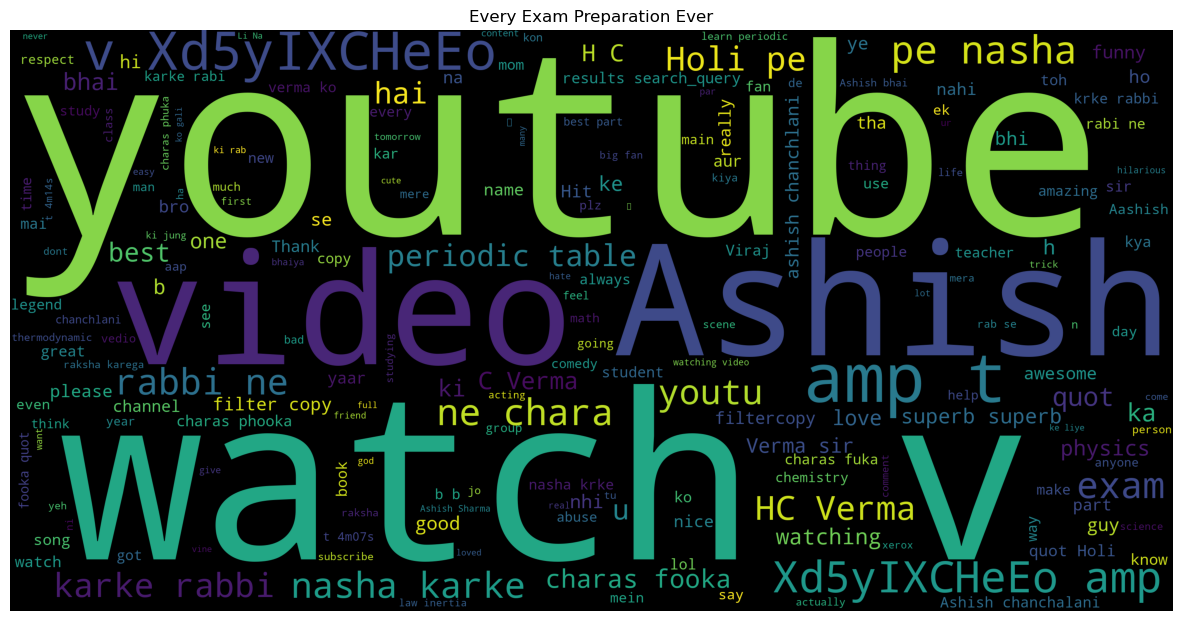

In [332]:
generate_wordcloud(return_r_wc(df.copy()),"Every Exam Preparation Ever")

### WordCloud For If Salary Were A Person

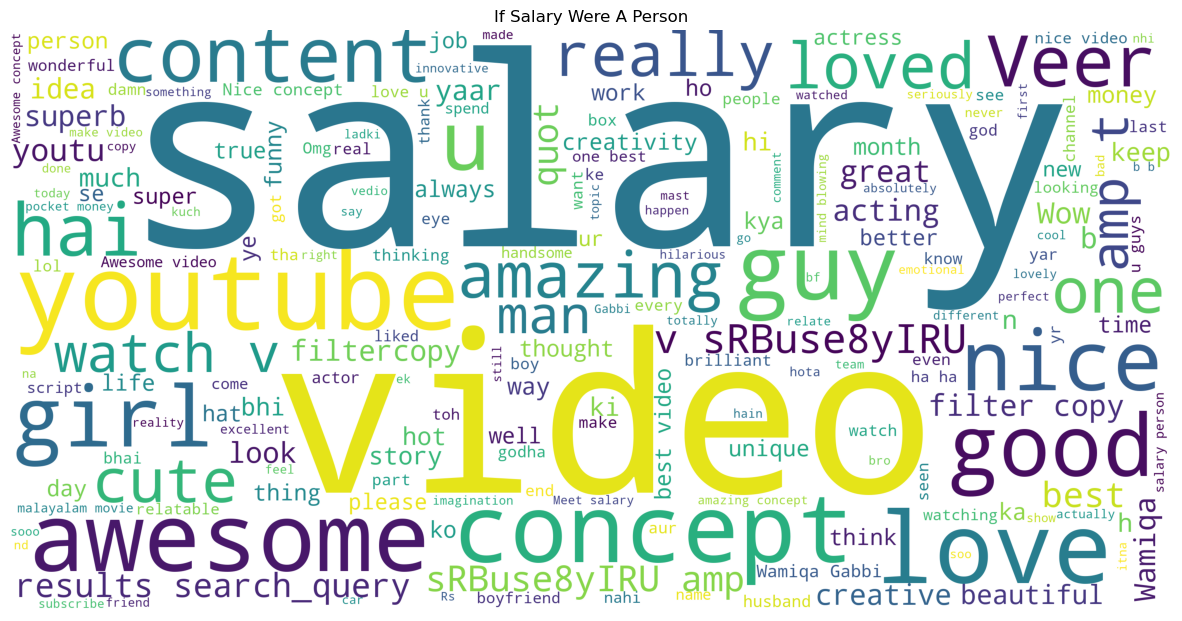

In [327]:
generate_wordcloud(return_r_wc(df2.copy()),"If Salary Were A Person")

## Emojis Breakdown

### Every Exam Preparation

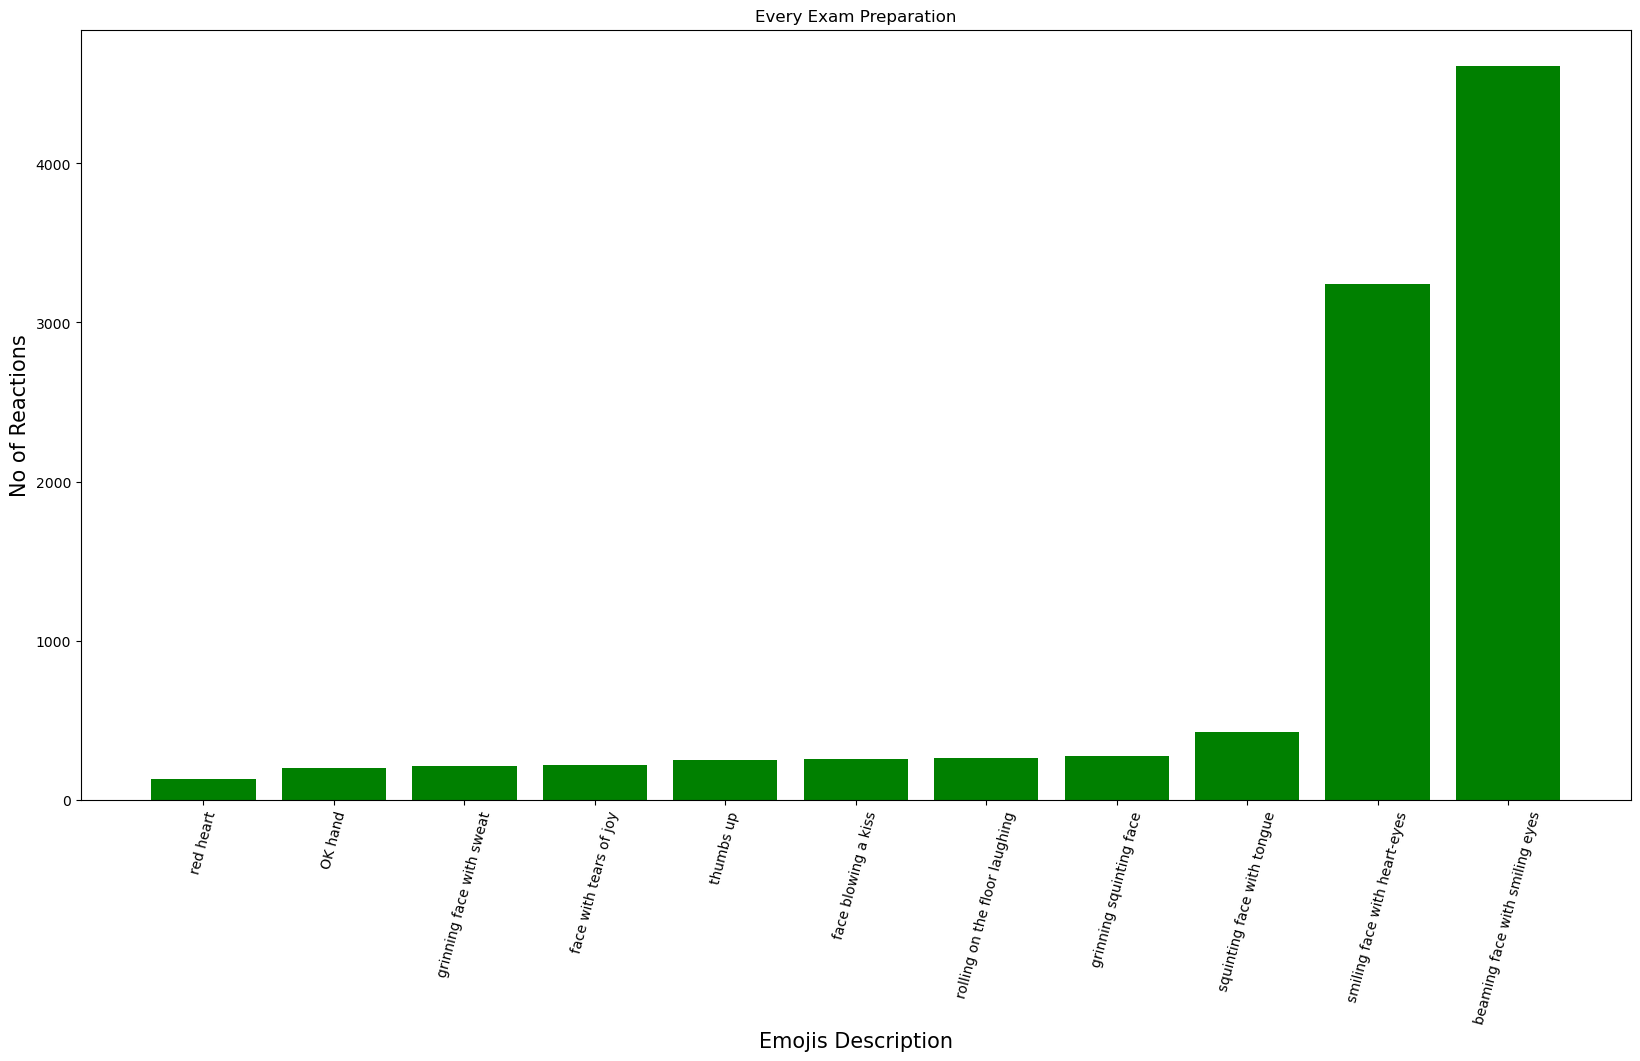

In [429]:
comment_string=''
for comment in df['Comment']:
    try:
        comment_string+=comment
    except:
        pass
emos=demoji.findall(comment_string)
count_all=Counter(comment_string)
count_emos={}
for i in emos:
    if(count_all.get(i)!=None):
        count_emos[i]=count_all.get(i)
    else:
        pass
count_emos={k: v for k, v in sorted(count_emos.items(), key=lambda item: item[1])}
label=" ".join(list(count_emos.keys())[-11:])
label=list(demoji.findall(label).values())
y=list(count_emos.values())[-11:]
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(label,y,color='green')
plt.xticks(label=label,rotation=75)
plt.xlabel('Emojis Description',fontsize=15)
plt.ylabel('No of Reactions',fontsize=15)
plt.title('Every Exam Preparation')
plt.show()

These are the 10 Most Used Emojis for **Every Exam Preparation** Video Ever

### If Salary Were A Person

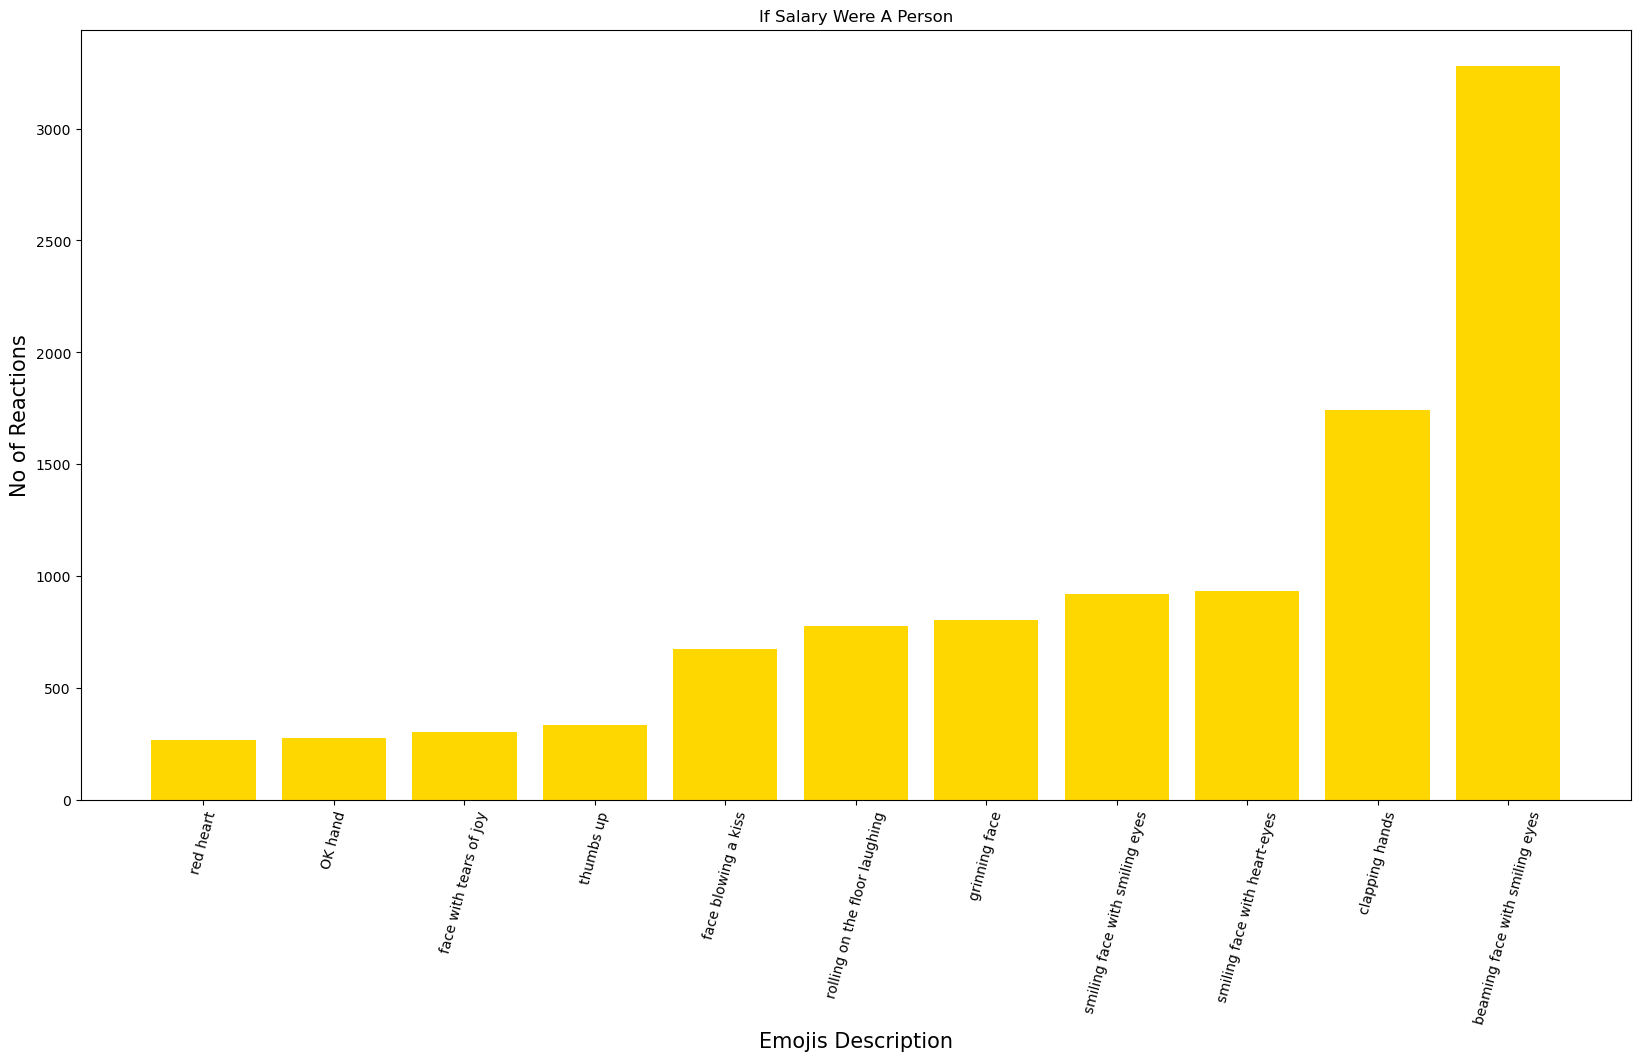

In [432]:
comment_string=''
for comment in df2['Comment']:
    try:
        comment_string+=comment
    except:
        pass
emos=demoji.findall(comment_string)
count_all=Counter(comment_string)
count_emos={}
for i in emos:
    if(count_all.get(i)!=None):
        count_emos[i]=count_all.get(i)
    else:
        pass
count_emos={k: v for k, v in sorted(count_emos.items(), key=lambda item: item[1])}
label=" ".join(list(count_emos.keys())[-11:])
label=list(demoji.findall(label).values())
y=list(count_emos.values())[-11:]
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(label,y,color='gold')
plt.xticks(label=label,rotation=75)
plt.xlabel('Emojis Description',fontsize=15)
plt.ylabel('No of Reactions',fontsize=15)
plt.title('If Salary Were A Person')
plt.show()

## TimeSeries Analysis of Both the Videos

In [590]:
def show_timeseries(df_,title):    
    df_['ts']=pd.to_datetime(df_['Time'])
    df_['hour']=df_['ts'].apply(lambda x:x.hour)
    df_['date']=df_['ts'].apply(lambda x:x.day)
    df_['month']=df_['ts'].apply(lambda x:x.month)
    df_['year']=df_['ts'].apply(lambda x:x.year)
    dates=[date for date in df_['date'].unique()]
    dates.sort()
    y=[df_[(df_['date']==date) & (df_['month']==3) &(df_['year']==2021)]['Comment'].count() for date in dates]
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(dates,y)
#     ax.set_xticks(np.arange(len(dates)))
#     ax.set_xticklabels(dates)
    plt.title(title,fontsize=20)
    plt.xlabel('Days',fontsize=15)
    plt.ylabel('Comments',fontsize=15)
    plt.show()

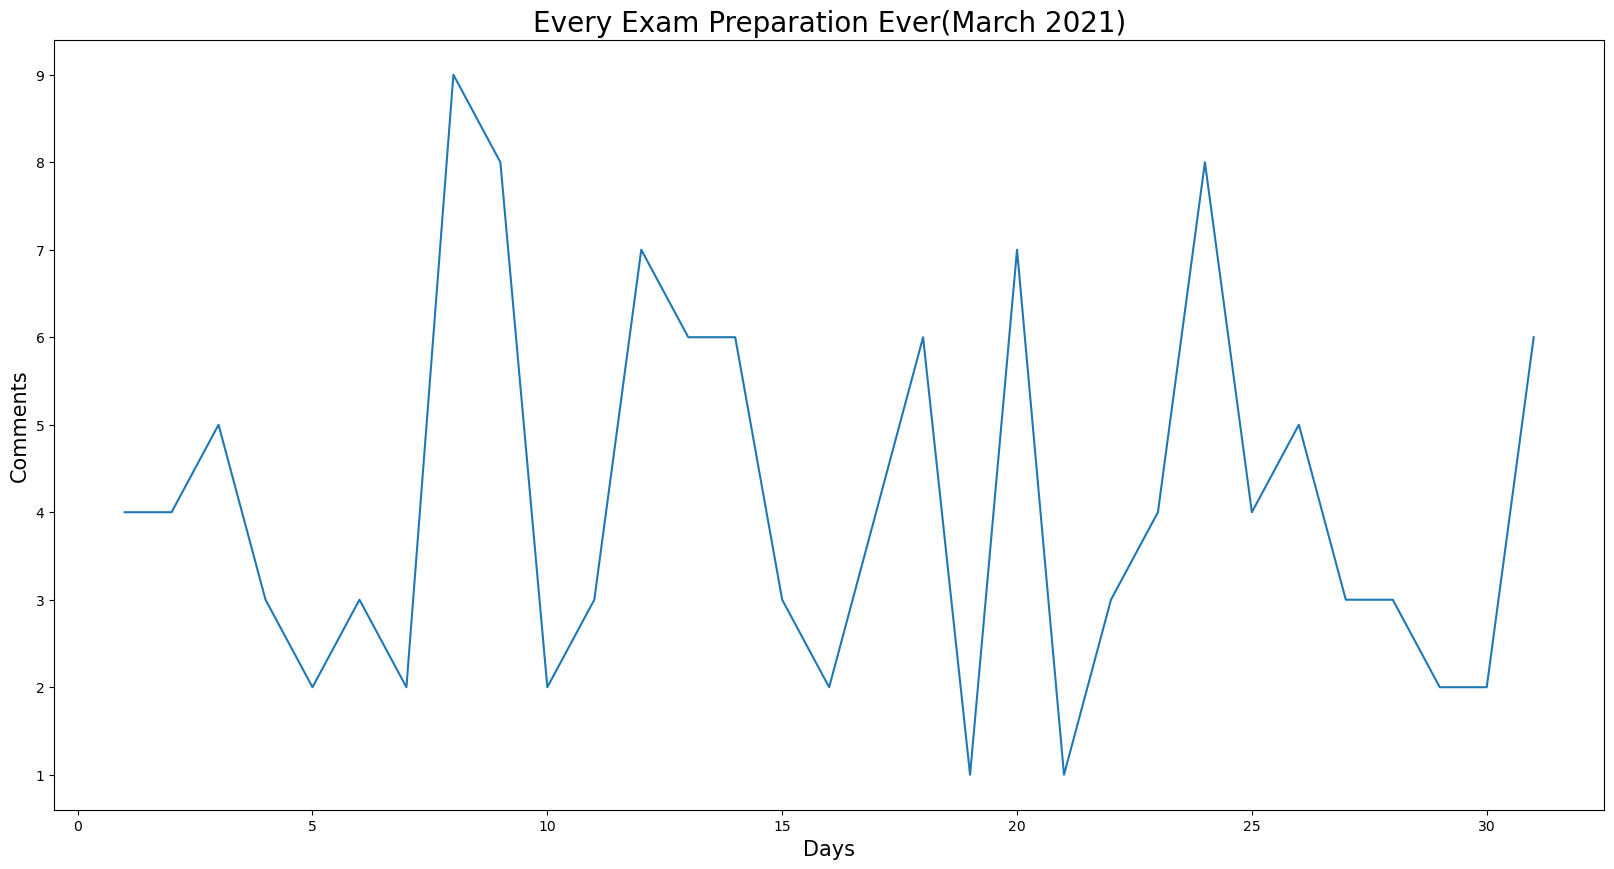

In [591]:
show_timeseries(df.copy(),'Every Exam Preparation Ever(March 2021)')

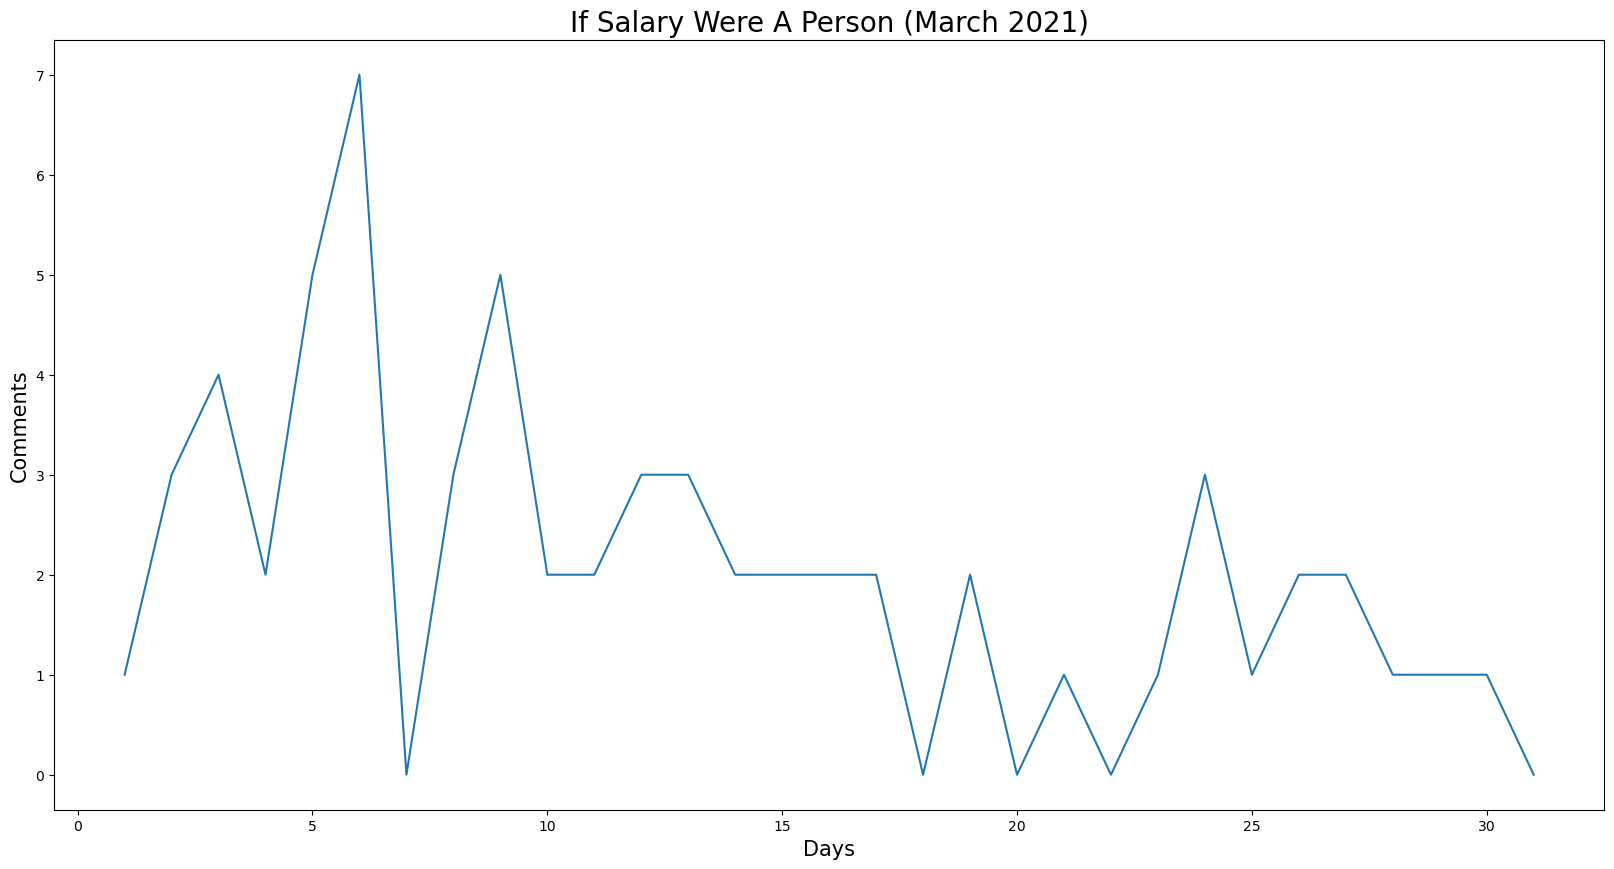

In [592]:
show_timeseries(df2.copy(),'If Salary Were A Person (March 2021)')

In [598]:
def show_timeseries_month(df_,title):    
    df_['ts']=pd.to_datetime(df_['Time'])
    df_['hour']=df_['ts'].apply(lambda x:x.hour)
    df_['date']=df_['ts'].apply(lambda x:x.day)
    df_['month']=df_['ts'].apply(lambda x:x.month)
    df_['year']=df_['ts'].apply(lambda x:x.year)
    months=[month for month in df_['month'].unique()]
    months.sort()
    y=[df_[(df_['month']==month) & (df_['year']==2020)]['Comment'].count() for month in months]
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(months,y)
#     ax.set_xticks(np.arange(len(months)))
#     ax.set_xticklabels(months)
    plt.title(title,fontsize=20)
    plt.xlabel('Months',fontsize=15)
    plt.ylabel('Comments',fontsize=15)
    plt.show()

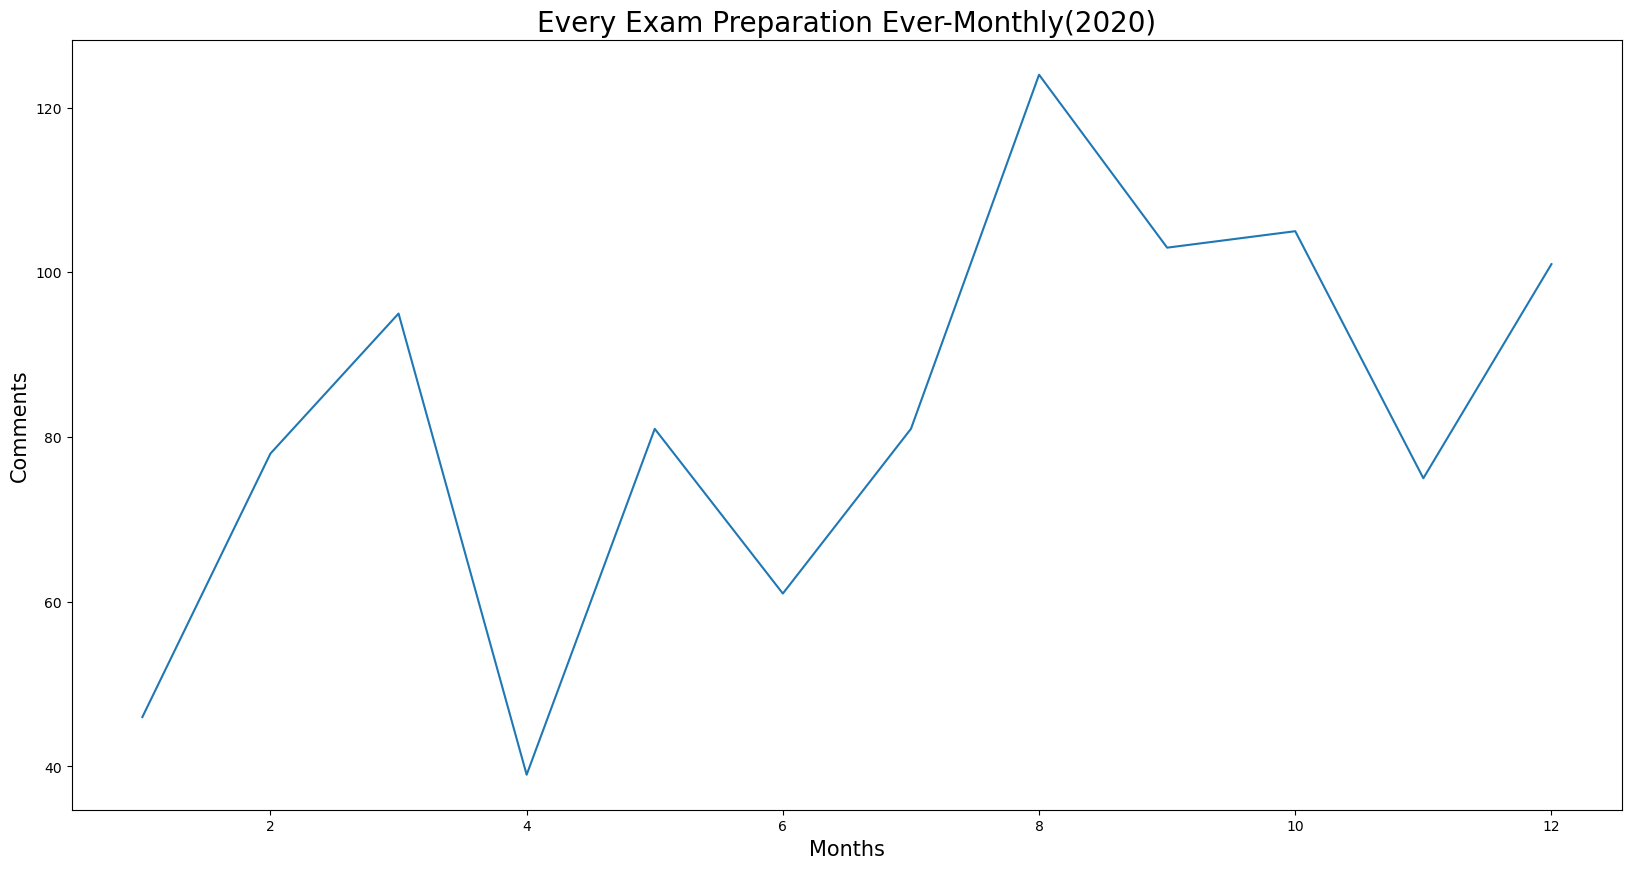

In [739]:
show_timeseries_month(df.copy(),'Every Exam Preparation Ever-Monthly(2020)')

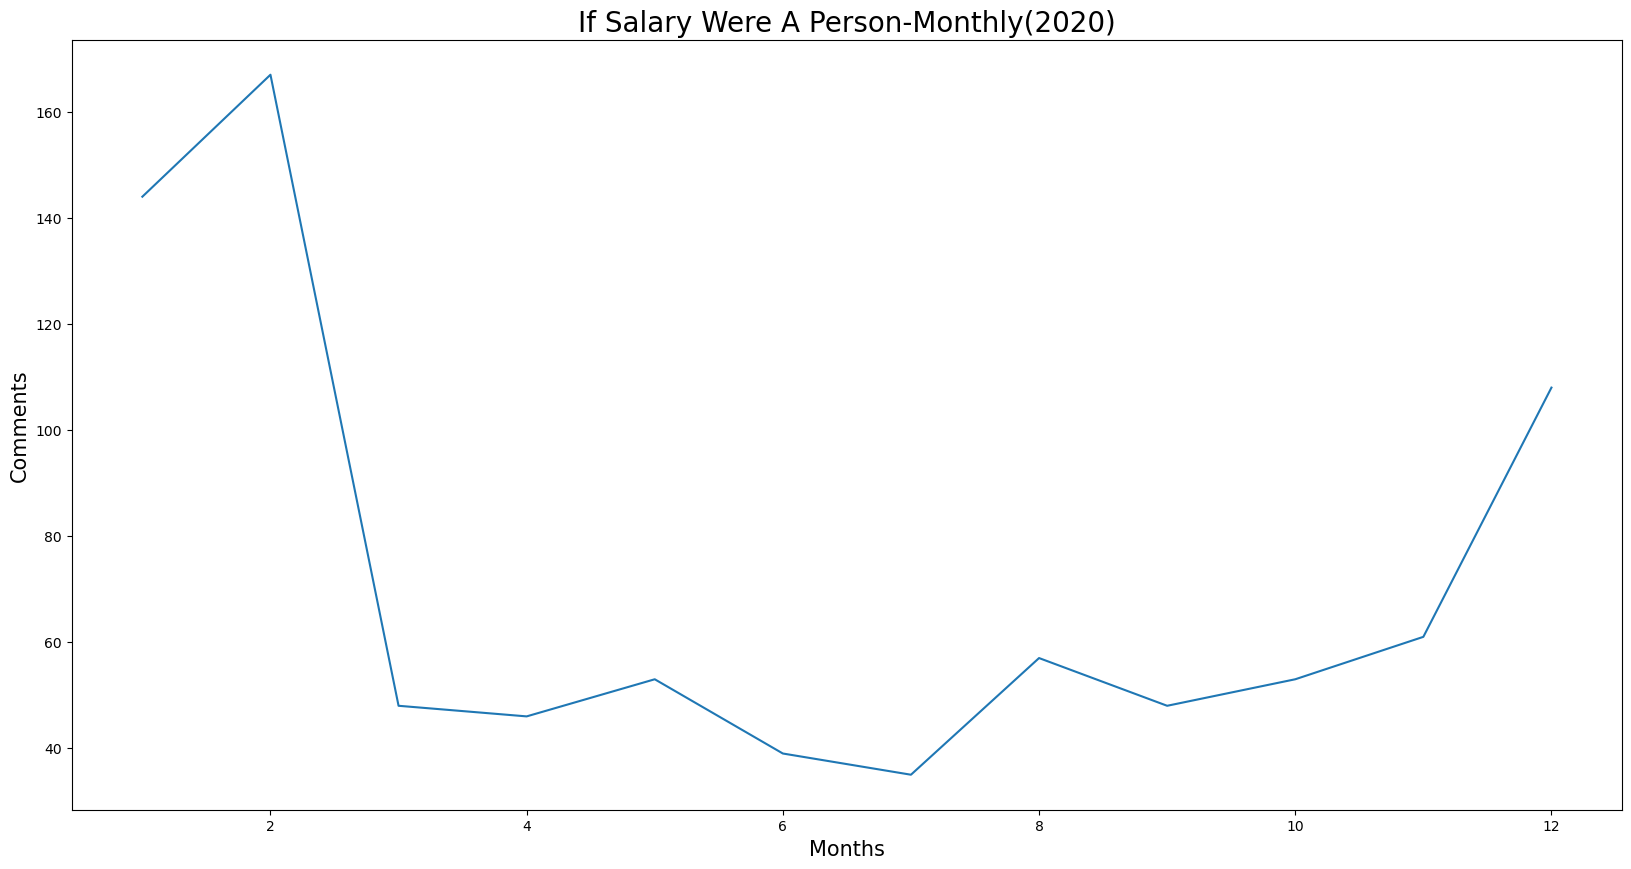

In [644]:
show_timeseries_month(df2.copy(),'If Salary Were A Person-Monthly(2020)')

In [641]:
def show_timeseries_year(df_,title):    
    df_['ts']=pd.to_datetime(df_['Time'])
    df_['hour']=df_['ts'].apply(lambda x:x.hour)
    df_['date']=df_['ts'].apply(lambda x:x.day)
    df_['month']=df_['ts'].apply(lambda x:x.month)
    df_['year']=df_['ts'].apply(lambda x:x.year)
    years=[year for year in df_['year'].unique()]
    years.sort()
    y=[df_[(df_['year']==year)]['Comment'].count() for year in years]
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(years,y)
#     ax.set_xticks(np.arange(len(years)))
#     ax.set_xticklabels(l)
    plt.xticks(range(2018,2022))
    plt.title(title,fontsize=20)
    plt.xlabel('Years',fontsize=15)
    plt.ylabel('Comments',fontsize=15)
    plt.show()

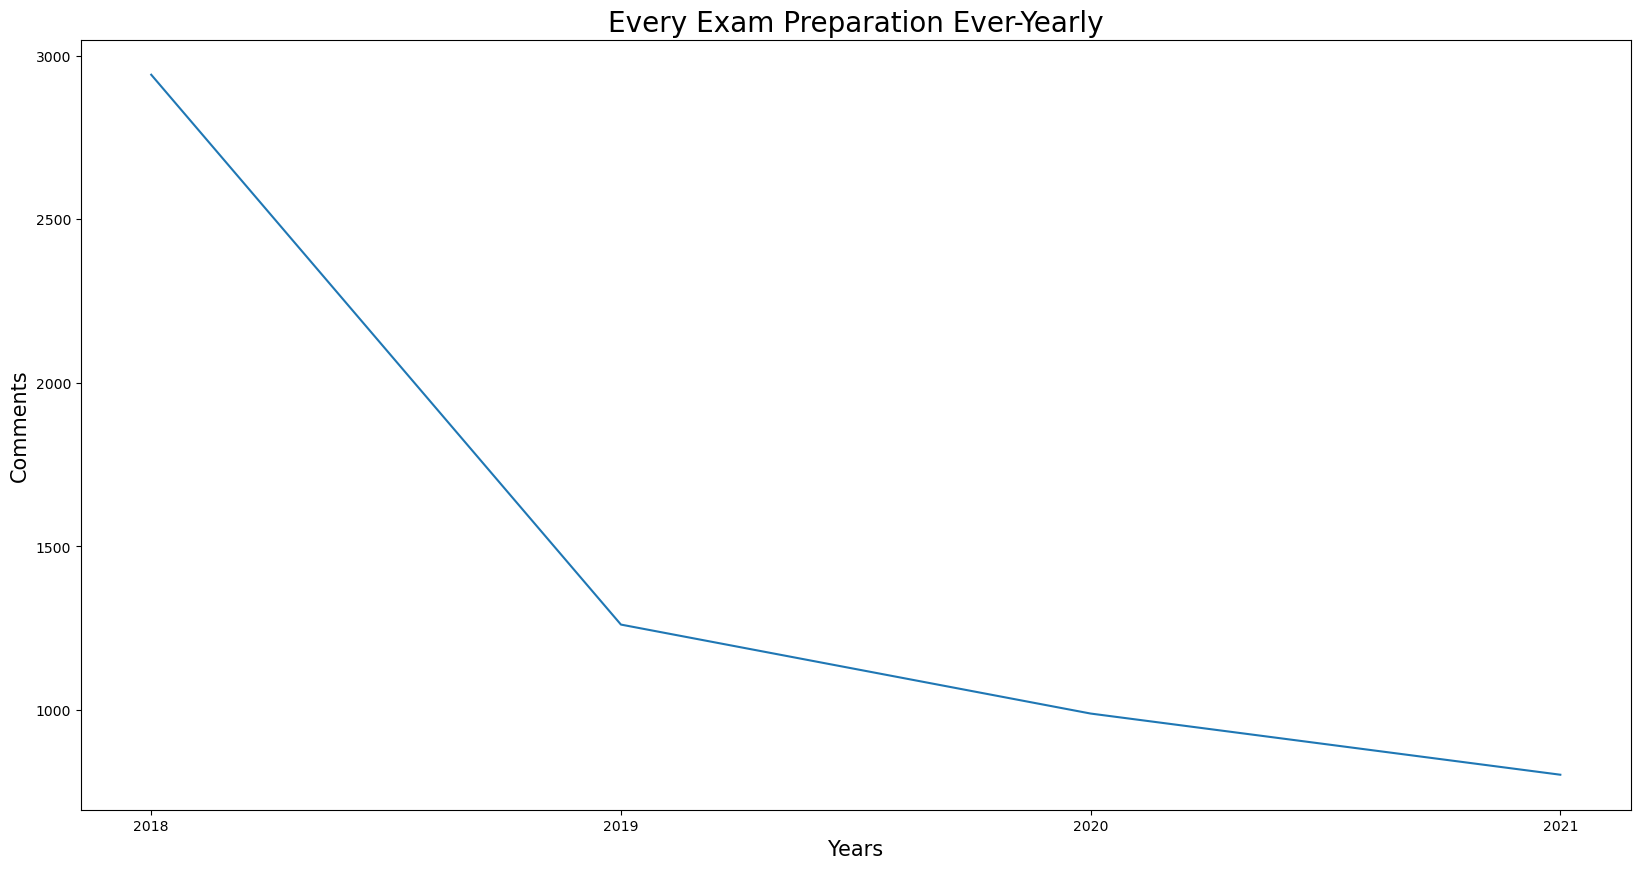

In [642]:
show_timeseries_year(df.copy(),'Every Exam Preparation Ever-Yearly')

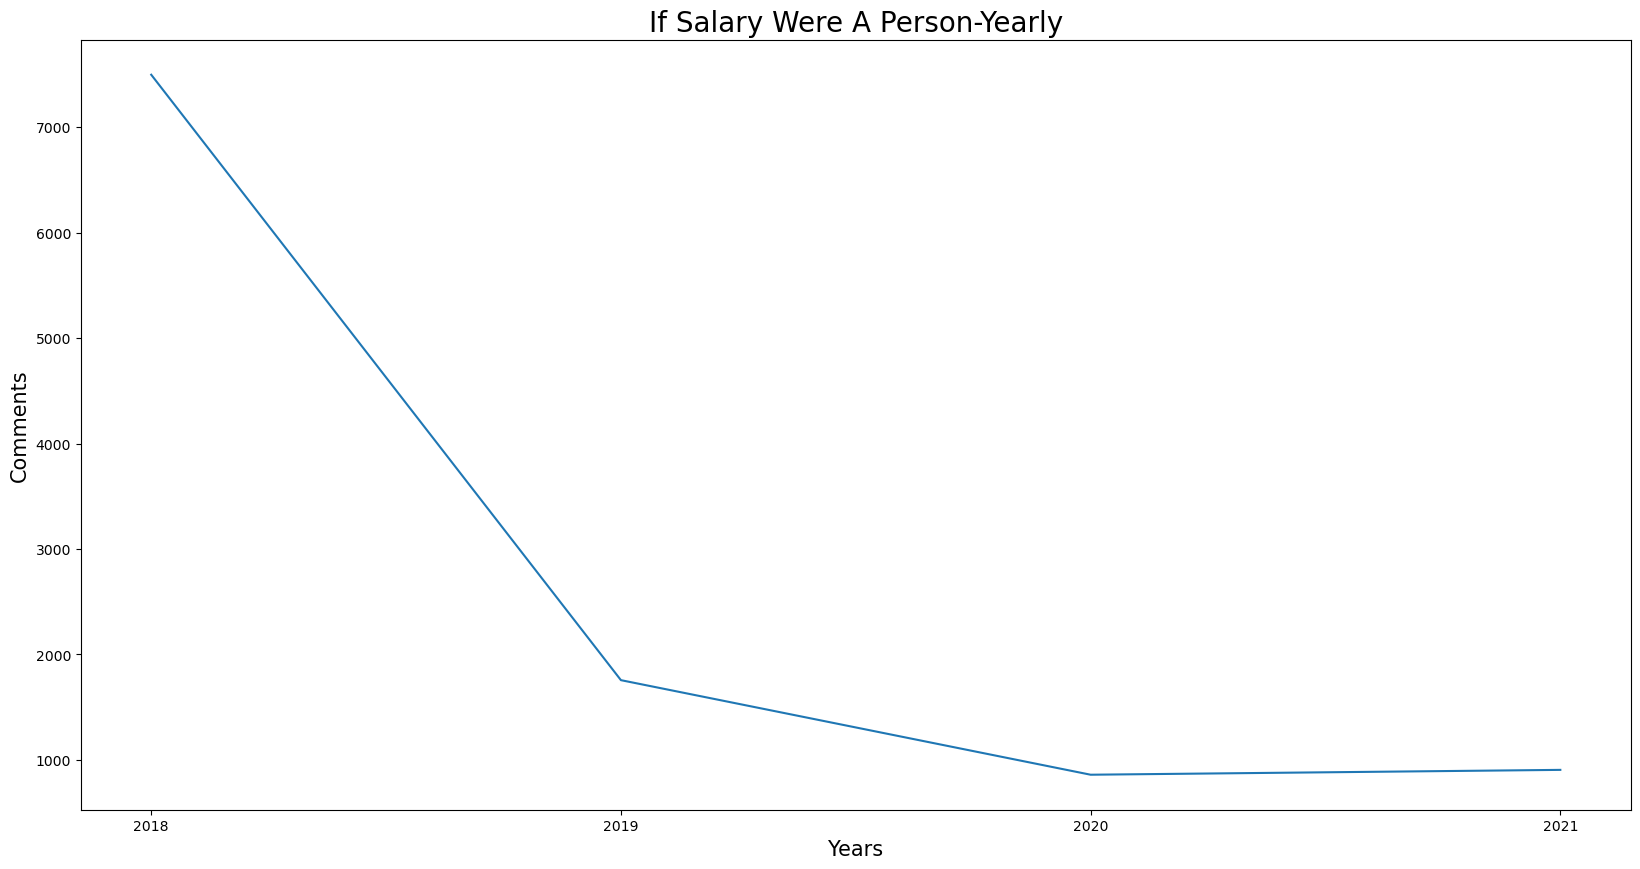

In [643]:
show_timeseries_year(df2.copy(),'If Salary Were A Person-Yearly')

It is Quite Evident that most number of the comments were in the year **2018** since that was the **initial Year of Release for both the videos**

And The Overall Analysis indicates that **IF Salary Were A Person** is more Popular.

### Persons Who Commented On Both Videos 

In [657]:
df.merge(df2,how='inner',on='Name')[['Name','Comment_x','Comment_y']]

,Name,Comment_x,Comment_y
0,Aditya Gupta,"<a href=""https://www.youtube.com/watch?v=Xd5yI...",Amazing video content !! I love this video !! ...
1,Himanshu sharma,75% views of this video is all because of ashi...,She is cute + gorgeous + hot af
2,Himanshu sharma,75% views of this video is all because of ashi...,It was fantastic 👍
3,Manish Kumar,No hc verma is harmed during this video,What a unique thought...i love it...awesome vi...
4,Manish Kumar,No hc verma is harmed during this video,Superb creation yaar.
...,...,...,...
297,Brunda RB,Finally!! Ashish on filter copy..<br>Filter co...,What aa content FilterCopy 👏👏<br>Kaha se soch...
298,Divya U. S.,Deal cancel 😂😂😂😂,Amazing concept filter Cofee 😍
299,Abhisek Shandil,Always...the best....😍😍,That &quot;hattttt&quot; mann.. 😂😂😂
300,FilterCopy,Share this with all your friends who are a ner...,What do you spend your salary on? Comment belo...


## Task 2

In [658]:
df3=pd.read_excel('Comments - PFA S2.xlsx')

In [659]:
df3.head()

,Name,Comment,Time,Likes,Reply Count
0,Dice Media,How did you guys like the episode? ❤️ Tell us ...,2020-10-30T07:34:03Z,3865,347
1,A-10 Sneha Gaikwad,Venkat 😂,2021-09-15T20:24:56Z,0,0
2,Priyank Khare,This show is aging well,2021-09-14T17:12:10Z,0,0
3,Manish Kumar,.<br><br><br><br><br><br><br><br><br><br><br><...,2021-09-14T17:08:57Z,0,0
4,Manish Kumar,.,2021-09-14T17:08:35Z,0,0


In [671]:
demoji.replace(df3['Comment'][6],"")

'Hey barkha give me your number'

In [660]:
df3.shape

(5667, 5)

We are Going to Use the Same Model For **Sentiment Classification.**

In [681]:
df3['Sentiment']=df3['Comment'].apply(lambda x:classifier(str(x))[0]['label'] if(len(str(x))<1000) else None)

In [682]:
df3['Sentiment']=df3['Sentiment'].apply(lambda x:mapper[x] if(x!=None) else None)

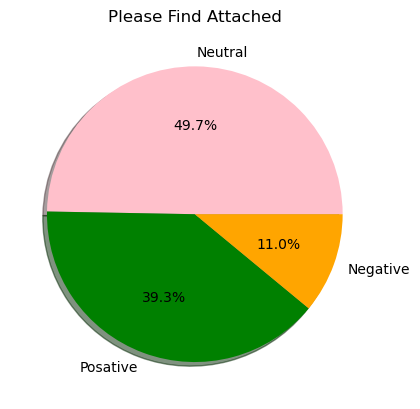

In [683]:
plt.pie(df3['Sentiment'].value_counts().values,labels=['Neutral','Posative','Negative'],colors=['pink','green','orange'],normalize=True, textprops = dict(color ="black"),shadow=True,autopct='%1.1f%%')
plt.title('Please Find Attached')
plt.show()

In [703]:
name_counter=[]
for i in df3['Comment'].values:
    if ('ayush' in str(i).lower() and 'barkha' in str(i).lower()):
        name_counter.append('Both')
    elif 'barkha' in str(i).lower():
        name_counter.append('Barkha')
    elif 'ayush' in str(i).lower():
        name_counter.append('Ayush')
    else:
        name_counter.append(None)

In [704]:
df3['Actor Mentioned']=name_counter

In [706]:
df3[df3['Actor Mentioned']=='Both']

,Name,Comment,Time,Likes,Reply Count,Sentiment,Actor Mentioned
13,Soumik Bera,"<a href=""https://www.youtube.com/watch?v=8PHs0...",2021-09-11T16:04:01Z,0,0,Neutral,Both
44,Adarsh Yadav,I want to see Ayush and barkha together a one...,2021-08-02T17:44:04Z,0,0,Neutral,Both
55,Rachana L,Literally barkha and Ayush will make a good pa...,2021-07-17T05:01:56Z,1,0,Posative,Both
63,Sejal Chaudhary,Barkha and Ayush together looking so cute 😀😍❤❤,2021-07-08T17:30:24Z,1,0,Posative,Both
72,CR MOTIONS,Here&#39;s a teaser of ayush mehra and barkha ...,2021-06-29T09:34:43Z,0,0,Neutral,Both
...,...,...,...,...,...,...,...
5633,its. aman,The most beautiful and cute couple ever! ❤️ 🔥 ...,2020-10-30T07:00:23Z,51,4,Posative,Both
5639,Praneeta Ramasamy,For sure this has been my longest wait ever!! ...,2020-10-30T06:59:49Z,37,2,Posative,Both
5642,Kumar Ayush,Ayush nd barkha best jodi😄😄😄😄,2020-10-30T06:59:18Z,0,0,Posative,Both
5653,Upasana Saha,Barkha and Ayush(Sanya and Shaurya) be the bes...,2020-10-30T06:57:33Z,2,0,Posative,Both


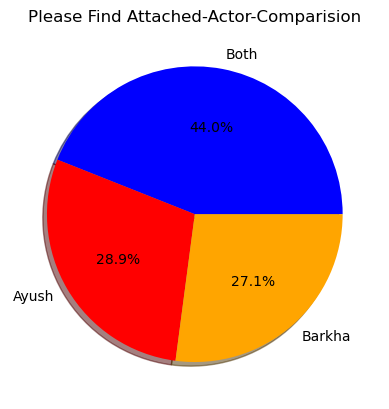

In [708]:
plt.pie(df3['Actor Mentioned'].value_counts().values,labels=['Both','Ayush','Barkha'],colors=['blue','red','orange'],normalize=True, textprops = dict(color ="black"),shadow=True,autopct='%1.1f%%')
plt.title('Please Find Attached-Actor-Comparision')
plt.show()

In [728]:
barkha=df3[df3['Actor Mentioned']=='Barkha']['Sentiment'].value_counts()
ayush=df3[df3['Actor Mentioned']=='Ayush']['Sentiment'].value_counts()
both=df3[df3['Actor Mentioned']=='Both']['Sentiment'].value_counts()

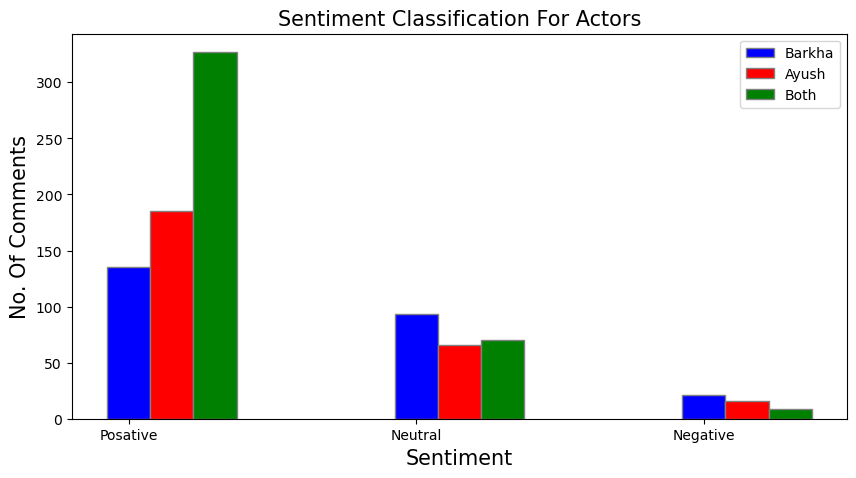

In [738]:
barWidth = 0.15
fig=plt.subplots(figsize=(10,5))
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
br3=[x+barWidth for x in br2]
plt.bar(br1,barkha.values,color='blue',label='Barkha',width=barWidth,edgecolor='grey')
plt.bar(br2,ayush.values,color='red',label='Ayush',width=barWidth,edgecolor='grey')
plt.bar(br3,both.values,color='green',label='Both',width=barWidth,edgecolor='grey')
plt.xlabel('Sentiment', fontsize = 15)
plt.ylabel('No. Of Comments', fontsize = 15)
plt.xticks([0,1,2],['Posative','Neutral','Negative'])
plt.title('Sentiment Classification For Actors',fontsize=15)
plt.legend()
plt.show()

From the Above Graph it is safe to say that **Ayush gets more posative comments than Barkha** and **both of them together is praised very well**. Also **Barkha seems to get a liitle bit more criticism than Ayush.** 